In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# import du csv

In [2]:
df_rawdata=pd.read_csv('data/dpt2018.csv', sep=';', na_values='XXXX')

Possibilité d'importer et de definir directement les NaN
df_rawdata=pd.read_csv('data/dpt2018.csv', sep=';', na_values='XXXX')

# visualisation des datas

In [3]:
df_rawdata.head(3)

,sexe,preusuel,annais,dpt,nombre
0,1,A,NaN,XX,27
1,1,AADAM,NaN,XX,27
2,1,AADEL,NaN,XX,55


In [4]:
df_rawdata.describe()

,sexe,annais,nombre
count,3.624994e+06,3.589386e+06,3.624994e+06
mean,1.536878e+00,1.972086e+03,2.348677e+01
std,4.986382e-01,3.352718e+01,8.047885e+01
min,1.000000e+00,1.900000e+03,3.000000e+00
25%,1.000000e+00,1.947000e+03,4.000000e+00
50%,2.000000e+00,1.979000e+03,7.000000e+00
75%,2.000000e+00,2.001000e+03,1.900000e+01
max,2.000000e+00,2.018000e+03,6.328000e+03


In [5]:
df_rawdata.columns

Index(['sexe', 'preusuel', 'annais', 'dpt', 'nombre'], dtype='object')

# Petit calcul pour vérif git

In [2]:
x=6*10
x

60

# proportion Homme/Femme

In [6]:
#nombre de femme par ligne

In [7]:
condition_f=df_rawdata.sexe==2
nombre_femmes=df_rawdata.loc[condition_f, 'nombre']
nombre_femmes

1678814     36
1678815      3
1678816    183
1678817      4
1678818      5
          ... 
3624989      3
3624990     23
3624991     21
3624992     30
3624993     95
Name: nombre, Length: 1946180, dtype: int64

In [8]:
#nombre de homme par ligne

In [9]:
condition_h=df_rawdata.sexe==1
nombre_hommes=df_rawdata.loc[condition_h, 'nombre']
nombre_hommes

0           27
1           27
2           55
3            3
4            3
          ... 
1678809      8
1678810      3
1678811    243
1678812     23
1678813     22
Name: nombre, Length: 1678814, dtype: int64

# Proportion homme et femme

In [10]:
total_femmes=sum(nombre_femmes)
total_hommes=sum(nombre_hommes)
propor_femmes=(total_femmes/(total_femmes+total_hommes))*100
propor_femmes

49.62503665606527

In [11]:
propor_hommes=(total_hommes/(total_femmes+total_hommes))*100
propor_hommes

50.37496334393473

# Comment a-t-elle évolué au cours du temps

In [12]:
df_Annee_sexe=df_rawdata.groupby(['annais','sexe'], as_index=False).nombre.sum()
df_Annee_sexe

,annais,sexe,nombre
0,1900.0,1,168332
1,1900.0,2,225100
2,1901.0,1,186710
3,1901.0,2,245022
4,1902.0,1,195069
...,...,...,...
233,2016.0,2,277646
234,2017.0,1,301974
235,2017.0,2,271703
236,2018.0,1,297526


#Si pas fait de definition des NaN au début
#serie_Annee_clean=serie_Annee.drop(labels=['XXXX'])
#serie_Annee_clean

# Générer un graph

In [13]:
serie_Annee_femme=df_Annee_sexe.loc[df_Annee_sexe.sexe==2, 'nombre']
serie_Annee_femme

1      225100
3      245022
5      248817
7      248681
9      252171
        ...  
229    293727
231    284612
233    277646
235    271703
237    266733
Name: nombre, Length: 119, dtype: int64

In [14]:
serie_Annee_homme=df_Annee_sexe.loc[df_Annee_sexe.sexe==1, 'nombre']
serie_Annee_homme

0      168332
2      186710
4      195069
6      197952
8      204735
        ...  
228    326851
230    317615
232    309316
234    301974
236    297526
Name: nombre, Length: 119, dtype: int64

In [15]:
df_Annee_total=df_rawdata.groupby(['annais']).nombre.sum()
df_Annee_total

annais
1900.0    393432
1901.0    431732
1902.0    443886
1903.0    446633
1904.0    456906
           ...  
2014.0    620578
2015.0    602227
2016.0    586962
2017.0    573677
2018.0    564259
Name: nombre, Length: 119, dtype: int64

In [16]:
serie_total=serie_Annee_homme.values+serie_Annee_femme.values
serie_total

array([393432, 431732, 443886, 446633, 456906, 467183, 478957, 478575,
       501916, 503158, 511950, 491157, 522083, 523992, 515307, 330717,
       262931, 286268, 327836, 365050, 624962, 612630, 586652, 591762,
       593917, 610536, 612190, 606326, 611635, 603067, 630166, 622986,
       615741, 583748, 588045, 559538, 554602, 546913, 541830, 541612,
       490393, 463983, 513042, 554920, 560689, 568194, 838799, 865069,
       863128, 864677, 854360, 819526, 816688, 799247, 804498, 800633,
       800606, 809460, 804276, 819747, 811081, 828315, 822703, 858049,
       866002, 854003, 849527, 824268, 814445, 816651, 819074, 847719,
       840360, 816866, 758090, 700029, 671411, 691052, 680738, 698973,
       738760, 741150, 732100, 684747, 695672, 703332, 711126, 700705,
       703405, 697535, 691897, 688140, 669295, 634336, 632697, 647193,
       648674, 638734, 646576, 652238, 682784, 670935, 657244, 649121,
       648659, 649350, 664585, 650357, 655240, 649927, 648865, 633686,
      

In [17]:
serie_prop_femme_année=(serie_Annee_femme/serie_total)*100
serie_prop_femme_année

1      57.214461
3      56.753264
5      56.054257
7      55.679047
9      55.191002
         ...    
229    47.331198
231    47.259920
233    47.302210
235    47.361669
237    47.271377
Name: nombre, Length: 119, dtype: float64

In [18]:
serie_prop_homme_année=(serie_Annee_homme/serie_total)*100
serie_prop_homme_année

0      42.785539
2      43.246736
4      43.945743
6      44.320953
8      44.808998
         ...    
228    52.668802
230    52.740080
232    52.697790
234    52.638331
236    52.728623
Name: nombre, Length: 119, dtype: float64

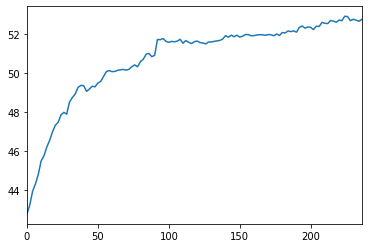

In [19]:
serie_prop_homme_année.plot()

In [20]:
mydict={'années':list(range(1900,2019)),'% Femmes':list(serie_prop_femme_année), '% Hommes':list(serie_prop_homme_année)}
df_trie_par_Annee=pd.DataFrame(data=mydict, index=mydict['années'])
df_trie_par_Annee
#df_trie_par_Annee['% Femmes'].plot()

,années,% Femmes,% Hommes
1900,1900,57.214461,42.785539
1901,1901,56.753264,43.246736
1902,1902,56.054257,43.945743
1903,1903,55.679047,44.320953
1904,1904,55.191002,44.808998
...,...,...,...
2014,2014,47.331198,52.668802
2015,2015,47.259920,52.740080
2016,2016,47.302210,52.697790
2017,2017,47.361669,52.638331


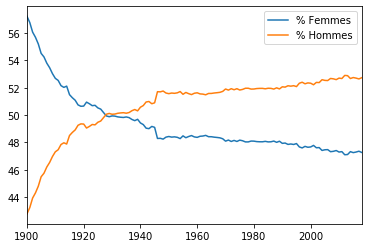

In [21]:
df_trie_par_Annee[['% Femmes','% Hommes']].plot()

In [22]:
df_trie_par_Annee_femme=df_trie_par_Annee.loc[:,'% Femmes']
df_trie_par_Annee_femme

1900    57.214461
1901    56.753264
1902    56.054257
1903    55.679047
1904    55.191002
          ...    
2014    47.331198
2015    47.259920
2016    47.302210
2017    47.361669
2018    47.271377
Name: % Femmes, Length: 119, dtype: float64

In [23]:
df_trie_par_Annee_homme=df_trie_par_Annee.loc[:,'% Hommes']
df_trie_par_Annee_homme

1900    42.785539
1901    43.246736
1902    43.945743
1903    44.320953
1904    44.808998
          ...    
2014    52.668802
2015    52.740080
2016    52.697790
2017    52.638331
2018    52.728623
Name: % Hommes, Length: 119, dtype: float64

# En 1900, parmi les 1707 prénoms recensés par l’Insee, le plus donné, Marie, représentait 11% des naissances

In [24]:
condition_Marie = (df_rawdata.preusuel == "MARIE") & (df_rawdata.annais==1900)
nombre_Marie=df_rawdata.loc[condition_Marie, 'nombre']
nombre_Marie.sum()

49752

In [25]:
nbr_naissance_1900=df_rawdata.loc[df_rawdata.annais==1900, 'nombre']
nbr_naissance_1900
nbr_naissance_1900.sum()

393432

In [26]:
percentage_Marie_1900=(nombre_Marie.sum())/(nbr_naissance_1900.sum())*100
percentage_Marie_1900.round(2)

12.65

# En 2017, on recensait 13.000 prénoms différents, soit 7,6 fois plus qu’en 1900.

In [27]:
#prenom_uniq=df_rawdata.loc[df_rawdata.annais==1900, df_rawdata.preusuel.unique()]
len(df_rawdata.preusuel.unique())

33484

In [28]:
df_2017=df_rawdata.loc[df_rawdata.annais==2017,:]
len(df_2017.preusuel.unique())

4399

In [29]:
df_1900=df_rawdata.loc[df_rawdata.annais==1900,:]
len(df_1900.preusuel.unique())

998

In [30]:
rapport_prenoms=(len(df_2017.preusuel.unique()))/(len(df_1900.preusuel.unique()))
rapport_prenoms

4.407815631262525

# Evolution du prénom Marie dans le temps

In [31]:
df_Marie=df_rawdata.loc[df_rawdata.preusuel=='MARIE',:]
df_Marie

,sexe,preusuel,annais,dpt,nombre
1061417,1,MARIE,1900.0,01,42
1061418,1,MARIE,1900.0,03,7
1061419,1,MARIE,1900.0,06,3
1061420,1,MARIE,1900.0,07,8
1061421,1,MARIE,1900.0,08,7
...,...,...,...,...,...
2951622,2,MARIE,2018.0,94,16
2951623,2,MARIE,2018.0,95,18
2951624,2,MARIE,2018.0,973,7
2951625,2,MARIE,2018.0,974,76


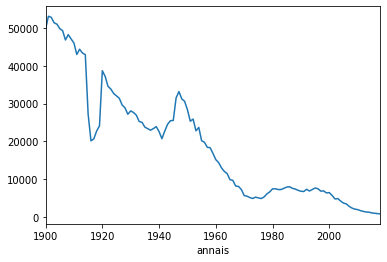

In [32]:
df_nbr_Marie=df_Marie.groupby(['annais']).nombre.sum()
df_nbr_Marie.plot()

# Un pic a été atteint en 2012, avec plus de 13.643 prénoms recensés.

In [33]:
nbr_prenom=df_rawdata.groupby(['annais']).preusuel.nunique()
liste_pic=[nbr_prenom.idxmax(),nbr_prenom.max()]
liste_pic

[2014.0, 4595]

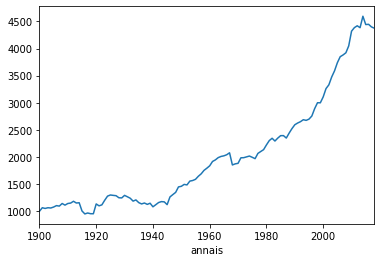

In [34]:
nbr_prenom.plot()

# Evolution des prénoms composés contenant Marie au cours du temps(Marie-Pierre, Marie-Paul, ....) ?

In [35]:

masq_df_Marie_comp=df_rawdata.preusuel.str.contains('-MARIE|MARIE-',na=False)

masq_df_Marie_comp

0          False
1          False
2          False
3          False
4          False
           ...  
3624989    False
3624990    False
3624991    False
3624992    False
3624993    False
Name: preusuel, Length: 3624994, dtype: bool

In [36]:
df_mariecomp=df_rawdata.loc[masq_df_Marie_comp]
df_mariecomp

,sexe,preusuel,annais,dpt,nombre
109075,1,ANDRÉ-MARIE,1949.0,59,3
109076,1,ANDRÉ-MARIE,1950.0,59,3
109077,1,ANDRÉ-MARIE,1954.0,59,5
109078,1,ANDRÉ-MARIE,1955.0,62,4
109079,1,ANDRÉ-MARIE,1969.0,59,3
...,...,...,...,...,...
3528622,2,THÉRÈSE-MARIE,1969.0,59,3
3528623,2,THÉRÈSE-MARIE,NaN,XX,140
3572967,2,VÉRONIQUE-MARIE,1959.0,59,3
3572968,2,VÉRONIQUE-MARIE,NaN,XX,19


In [37]:
masq_df_Marie_comp.sum()

75005

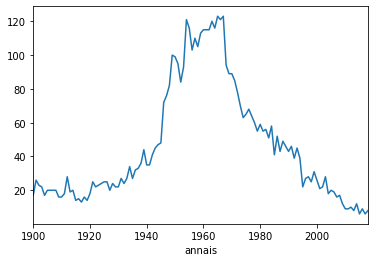

In [38]:
nbr_prenom_varie=df_mariecomp.groupby(['annais']).preusuel.nunique()
nbr_prenom_varie.plot()

# Combien de prénoms faut-il pour nommer 50% des bébés par année (e.g. en 1900 27 prénoms suffisent) ?

In [40]:
df_nbr_total_noms=df_rawdata.groupby(['annais']).nombre.sum()
df_nbr_noms_total_diviser=df_nbr_total_noms.apply(lambda x:x*0.5)
df_nbr_noms_total_diviser

annais
1900.0    196716.0
1901.0    215866.0
1902.0    221943.0
1903.0    223316.5
1904.0    228453.0
            ...   
2014.0    310289.0
2015.0    301113.5
2016.0    293481.0
2017.0    286838.5
2018.0    282129.5
Name: nombre, Length: 119, dtype: float64

In [124]:
nbr_prenom_varie_total=df_rawdata.groupby(['annais', 'preusuel']).nombre.sum()
#nbr_prenom_varie_total.sort_values(ascending=True)
classement_prénom_année=nbr_prenom_varie_total.reset_index().sort_values(['annais', 'nombre'] , ascending=(True, False))
classement_prénom_année

,annais,preusuel,nombre
657,1900.0,MARIE,49752
535,1900.0,JEAN,14100
543,1900.0,JEANNE,13981
613,1900.0,LOUIS,9051
651,1900.0,MARGUERITE,8058
...,...,...,...
240537,2018.0,ÉMMA,3
240539,2018.0,ÉNAËL,3
240540,2018.0,ÉNOLA,3
240543,2018.0,ÉRINE,3


In [87]:
classement_prénom_année_sans_lesrares=(classement_prénom_année[classement_prénom_année
                                                                    .preusuel != '_PRENOMS_RARES'])
classement_prénom_année_sans_lesrares

,annais,preusuel,nombre
657,1900.0,MARIE,49752
535,1900.0,JEAN,14100
543,1900.0,JEANNE,13981
613,1900.0,LOUIS,9051
651,1900.0,MARGUERITE,8058
...,...,...,...
240537,2018.0,ÉMMA,3
240539,2018.0,ÉNAËL,3
240540,2018.0,ÉNOLA,3
240543,2018.0,ÉRINE,3


In [117]:
#pd.options.display.max_rows = 9999 

#nbr_prenom_varie_total=df_rawdata.groupby(['annais', 'preusuel']).nombre.sum().groupby(level=[0]).cumsum()

#nbr_prenom_varie_total[:1000]

In [144]:
data_frame_classe = (classement_prénom_année_sans_lesrares.groupby(['annais', 'preusuel'])
                   .nombre.sum().reset_index()
                   .sort_values(['annais', 'nombre'] , ascending=(True, False)).groupby(['annais', 'preusuel'], sort=False)
                   .nombre.sum().groupby(level=[0]).cumsum())
data_frame_classe


annais  preusuel  
1900.0  MARIE          49752
        JEAN           63852
        JEANNE         77833
        LOUIS          86884
        MARGUERITE     94942
                       ...  
2018.0  ÉMMA          510269
        ÉNAËL         510272
        ÉNOLA         510275
        ÉRINE         510278
        ÎMRAN         510281
Name: nombre, Length: 240435, dtype: int64

In [147]:
somme_date=data_frame_classe/df_nbr_total_noms
somme_date

annais  preusuel  
1900.0  MARIE         0.126456
        JEAN          0.162295
        JEANNE        0.197831
        LOUIS         0.220836
        MARGUERITE    0.241317
                        ...   
2018.0  ÉMMA          0.904317
        ÉNAËL         0.904322
        ÉNOLA         0.904328
        ÉRINE         0.904333
        ÎMRAN         0.904338
Name: nombre, Length: 240435, dtype: float64

In [157]:
mask_50=somme_date<=0.5000000000000000000000000001
mask_50

annais  preusuel  
1900.0  MARIE          True
        JEAN           True
        JEANNE         True
        LOUIS          True
        MARGUERITE     True
                      ...  
2018.0  ÉMMA          False
        ÉNAËL         False
        ÉNOLA         False
        ÉRINE         False
        ÎMRAN         False
Name: nombre, Length: 240435, dtype: bool

In [158]:
dataFrame_def=mask_50.groupby('annais').sum()
dataFrame_def

annais
1900.0     23.0
1901.0     24.0
1902.0     24.0
1903.0     24.0
1904.0     24.0
1905.0     24.0
1906.0     24.0
1907.0     24.0
1908.0     24.0
1909.0     24.0
1910.0     24.0
1911.0     25.0
1912.0     25.0
1913.0     25.0
1914.0     25.0
1915.0     25.0
1916.0     24.0
1917.0     24.0
1918.0     24.0
1919.0     24.0
1920.0     24.0
1921.0     25.0
1922.0     25.0
1923.0     25.0
1924.0     26.0
1925.0     27.0
1926.0     27.0
1927.0     27.0
1928.0     27.0
1929.0     28.0
1930.0     28.0
1931.0     28.0
1932.0     28.0
1933.0     28.0
1934.0     28.0
1935.0     28.0
1936.0     28.0
1937.0     28.0
1938.0     27.0
1939.0     27.0
1940.0     27.0
1941.0     27.0
1942.0     26.0
1943.0     25.0
1944.0     25.0
1945.0     25.0
1946.0     26.0
1947.0     26.0
1948.0     28.0
1949.0     29.0
1950.0     30.0
1951.0     31.0
1952.0     31.0
1953.0     32.0
1954.0     33.0
1955.0     33.0
1956.0     34.0
1957.0     34.0
1958.0     34.0
1959.0     33.0
1960.0     34.0
1961.0     33.0
1

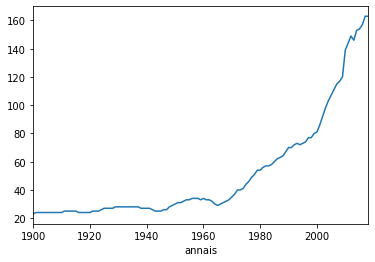

In [159]:
dataFrame_def.plot()

# La part des 10 prénoms les plus utilisés a-t-elle bien été divisée par 5 entre 1900 et aujourd’hui ?

In [196]:
clmt_annee_10=classement_prénom_année_sans_lesrares.groupby('annais').head(10)
clmt_annee_10

,annais,preusuel,nombre
657,1900.0,MARIE,49752
535,1900.0,JEAN,14100
543,1900.0,JEANNE,13981
613,1900.0,LOUIS,9051
651,1900.0,MARGUERITE,8058
797,1900.0,PIERRE,7461
559,1900.0,JOSEPH,7259
446,1900.0,GERMAINE,6980
481,1900.0,HENRI,6919
615,1900.0,LOUISE,6696


In [197]:
somme_clmt_annee_10=clmt_annee_10.groupby('annais').sum()
somme_clmt_annee_10

,nombre
annais,
1900.0,130257
1901.0,141938
1902.0,145194
1903.0,143645
1904.0,144889
1905.0,146315
1906.0,148898
1907.0,146425
1908.0,153733


In [198]:
nbr_tot=classement_prénom_année.groupby('annais').sum()
nbr_tot

,nombre
annais,
1900.0,393432
1901.0,431732
1902.0,443886
1903.0,446633
1904.0,456906
1905.0,467183
1906.0,478957
1907.0,478575
1908.0,501916


In [201]:
ratio=somme_clmt_annee_10/nbr_tot
ratio

,nombre
annais,
1900.0,0.331079
1901.0,0.328764
1902.0,0.327097
1903.0,0.321618
1904.0,0.317109
1905.0,0.313186
1906.0,0.310880
1907.0,0.305960
1908.0,0.306292


In [202]:
ratio_tot=ratio.loc[1900]/ratio.loc[2018]
ratio_tot

nombre    4.386649
dtype: float64

# [Plus dur] Qu’en pensez vous? Extrait du Figaro :À l’échelle régionale, le prénom Loïc, très populaire entre 1975 et 2000,constitue un bon exemple de cette circulation des prénoms. Cantonné à laBretagne jusque dans les années 1980, il a essaimé en France jusqu’à êtredavantage donné dans d’autres régions, s’effaçant en Bretagne.